# Ensemble Techniques Project 

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load the dataset 

In [2]:
df = pd.read_csv("F:\Parkinsons.csv")
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


Eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
#shape of the data
df.shape

(195, 24)

In [5]:
# analyze the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
#Check the missing values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

All the columns appear to be of numerical data with data type Integer and float. No null values.

# Numerical variables

MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,S
himmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency
variation 9. car name: string (unique for each instance)
    
# Categorical nominal variable

Name - ASCII subject name and recording number

In [7]:
#To check the individual attributes for their basic statistics such as central values
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
x='MDVP:Fo(Hz)'
y='MDVP:Fhi(Hz)'
z='MDVP:Flo(Hz)'
x1='MDVP:Jitter(%)'
x2='MDVP:Jitter(Abs)'
x3='MDVP:RAP'
y1='MDVP:PPQ'
y2='Jitter:DDP'
y3='MDVP:Shimmer'
z1='MDVP:Shimmer(dB)'
z2='Shimmer:APQ3'
z3='Shimmer:APQ5'
z4='MDVP:APQ'
z5='Shimmer:DDA'
x4='NHR'
y4='HNR'

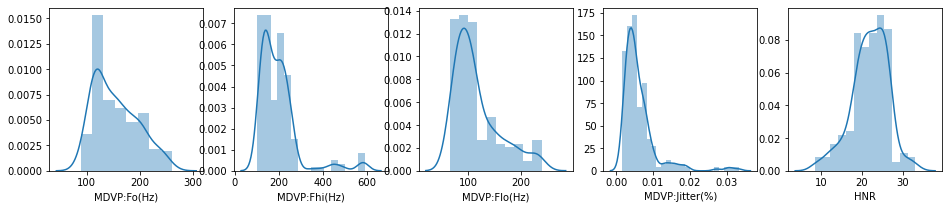

In [9]:
#spread
fig, ax = plt.subplots(1,5,figsize=(16,3)) 
sns.distplot(df[x],ax=ax[0]) 
sns.distplot(df[y],ax=ax[1]) 
sns.distplot(df[z],ax=ax[2])
sns.distplot(df[x1],ax=ax[3]) 
sns.distplot(df[y4],ax=ax[4])

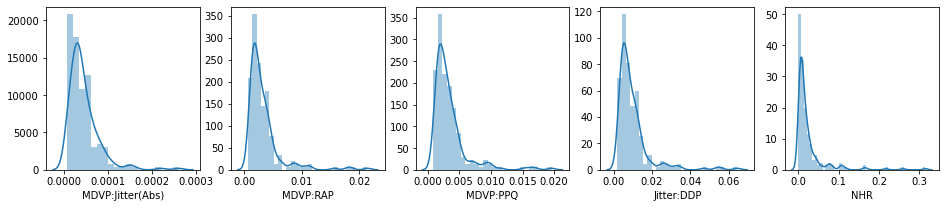

In [10]:
fig, ax = plt.subplots(1,5,figsize=(16,3)) 
sns.distplot(df[x2],ax=ax[0]) 
sns.distplot(df[x3],ax=ax[1]) 
sns.distplot(df[y1],ax=ax[2])
sns.distplot(df[y2],ax=ax[3]) 
sns.distplot(df[x4],ax=ax[4])

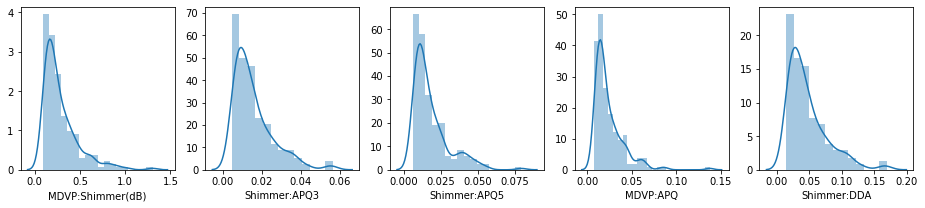

In [11]:
fig, ax = plt.subplots(1,5,figsize=(16,3)) 
sns.distplot(df[z1],ax=ax[0]) 
sns.distplot(df[z2],ax=ax[1]) 
sns.distplot(df[z3],ax=ax[2])
sns.distplot(df[z4],ax=ax[3])
sns.distplot(df[z5],ax=ax[4])

In [12]:
#skewness
print(round(stats.skew(df[x]),3))
print(round(stats.skew(df[y]),3))
print(round(stats.skew(df[z]),3))
print(round(stats.skew(df[x1]),3))
print(round(stats.skew(df[x2]),3))
print(round(stats.skew(df[x3]),3))
print(round(stats.skew(df[y1]),3))
print(round(stats.skew(df[y2]),3))
print(round(stats.skew(df[x4]),3))
print(round(stats.skew(df[y4]),3))

0.587
2.523
1.208
3.061
2.629
3.335
3.05
3.336
4.188
-0.51


#Observation 
MDVP:Fo(Hz) with a median of 148.7. The mean is sligtly more that median which means that there could be slight skewness on the right. MDVP:Fhi(Hz) is with a median of 175.83. the mean is more than median which means that there could be skewness on the right.  MDVP:Fhi(Hz) is with a median of 104.3. The mean is more than median which means that there could be skewness on the right. HNR  with a median of 22.085000. The mean is less than median which means that there could be skewness on the left.While NHR has positive skewness indicating that the skewness is on the right. HNR has slight negative skewness indicating that the skewness is on the left.

In [13]:
#Split the dataset into training and test set in the ratio of 70:30

from sklearn.model_selection import train_test_split
X= df.loc[:, df.columns != 'status'].values[:,1:] 
Y= df.loc[:,'status'].values
X_train , X_test , Y_train , Y_test =train_test_split(X,Y, test_size =0.30 , random_state  =42)

In [14]:
#Prepare the data for training - Scale the data if necessary, get rid of missing values

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X_Train_stand = X_train.copy()
X_Test_stand = X_test.copy()
scale = StandardScaler().fit(X_Train_stand)

X_train= scale.transform(X_Train_stand)
X_test= scale.transform(X_Test_stand)

In [15]:
if (pd.DataFrame(X_train).isnull().sum().any()==0):
    print('There are no null values in the training datset')
else:
    print('There are null values in the training datset')

if (pd.DataFrame(X_test).isnull().sum().any()==0):
    print('There are no null values in the test datset')
else:
    print('There are null values in the test datset')

There are no null values in the training datset
There are no null values in the test datset


Train at least 3 standard classification algorithms

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression()
lr.fit(X_train , Y_train)

LogisticRegression()

In [17]:
# accuracies on the test data
print(f"Accuracy of logistic regression with test data = {lr.score(X_test, Y_test)}")
Y_predict_LR = lr.predict(X_test)
print(metrics.classification_report(Y_test, Y_predict_LR, labels=[1, 0]))

Accuracy of logistic regression with test data = 0.864406779661017
              precision    recall  f1-score   support

           1       0.88      0.95      0.91        44
           0       0.82      0.60      0.69        15

    accuracy                           0.86        59
   macro avg       0.85      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59



# K-NN model

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# instantiate learning model (k = 5)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)

print(accuracy_score(Y_test, Y_pred_knn))
print(metrics.classification_report(Y_test, Y_pred_knn, labels=[1, 0]))

0.8983050847457628
              precision    recall  f1-score   support

           1       0.90      0.98      0.93        44
           0       0.91      0.67      0.77        15

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59



# Support Vector Machine(SVM) model

In [19]:
from sklearn.svm import SVC 
svc =SVC(kernel ='sigmoid', random_state = 1)
svc.fit(X_train,Y_train)
Y_pred_svm = svc.predict(X_test)
print(accuracy_score(Y_pred_svm,Y_test))
print(metrics.classification_report(Y_test, Y_pred_svm, labels=[1, 0]))

0.8813559322033898
              precision    recall  f1-score   support

           1       0.88      0.98      0.92        44
           0       0.90      0.60      0.72        15

    accuracy                           0.88        59
   macro avg       0.89      0.79      0.82        59
weighted avg       0.88      0.88      0.87        59



# Naive Bayes model

In [20]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train, Y_train)
Y_pred_nb = nb.predict(X_test)
print(accuracy_score(Y_pred_nb,Y_test))
print(metrics.classification_report(Y_test, Y_pred_nb, labels=[1, 0]))

0.7627118644067796
              precision    recall  f1-score   support

           1       0.92      0.75      0.83        44
           0       0.52      0.80      0.63        15

    accuracy                           0.76        59
   macro avg       0.72      0.78      0.73        59
weighted avg       0.82      0.76      0.78        59



In [ ]:
# Train a meta-classifier and note the accuracy on test data

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
estimators = [
    ('lr', LogisticRegression(solver="liblinear")),
    ('knn',KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )),
    ('XGB',XGBClassifier(random_state=0, learning_rate=0.1, n_estimators=100, max_depth=3))]
clf = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())
model = clf.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.86440678

# Bagging

Train at least one standard Ensemble model

In [21]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, Y_train)

from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, Y_train)
Y_pred_bg = bgcl.predict(X_test)

print(bgcl.score(X_test , Y_test))
print(metrics.classification_report(Y_test, Y_pred_bg, labels=[1, 0]))

0.8813559322033898
              precision    recall  f1-score   support

           1       0.89      0.95      0.92        44
           0       0.83      0.67      0.74        15

    accuracy                           0.88        59
   macro avg       0.86      0.81      0.83        59
weighted avg       0.88      0.88      0.88        59



# Compare all the models and pick the best one among them 

In [22]:
#Logistic Summary
acc_LR=round(metrics.accuracy_score(Y_test, Y_predict_LR),2)
Recall_LR=round(metrics.recall_score(Y_test, Y_predict_LR),2)
Precision_LR=round(metrics.precision_score(Y_test, Y_predict_LR),2)
F1_LR=round(metrics.f1_score(Y_test, Y_predict_LR),2)

In [23]:
#KNN Summary
acc_KNN=round(metrics.accuracy_score(Y_test, Y_pred_knn),2)
Recall_KNN=round(metrics.recall_score(Y_test, Y_pred_knn),2)
Precision_KNN=round(metrics.precision_score(Y_test, Y_pred_knn),2)
F1_KNN=round(metrics.f1_score(Y_test, Y_pred_knn),2)

In [24]:
#SVM Summary
acc_SVM=round(metrics.accuracy_score(Y_test, Y_pred_svm),2)
Recall_SVM=round(metrics.recall_score(Y_test, Y_pred_svm),2)
Precision_SVM=round(metrics.precision_score(Y_test, Y_pred_svm),2)
F1_SVM=round(metrics.f1_score(Y_test, Y_pred_svm),2)

In [25]:
#Bagging Summary
acc_bg=round(metrics.accuracy_score(Y_test, Y_pred_bg),2)
Recall_bg=round(metrics.recall_score(Y_test, Y_pred_bg),2)
Precision_bg=round(metrics.precision_score(Y_test, Y_pred_bg),2)
F1_bg=round(metrics.f1_score(Y_test, Y_pred_bg),2)

In [26]:
#Native Bayes Summary
acc_NB=round(metrics.accuracy_score(Y_test, Y_pred_nb),2)
Recall_NB=round(metrics.recall_score(Y_test, Y_pred_nb),2)
Precision_NB=round(metrics.precision_score(Y_test, Y_pred_nb),2)
F1_NB=round(metrics.f1_score(Y_test, Y_pred_nb),2)

In [27]:
summary = {'Accuracy': [acc_LR,acc_KNN,acc_NB,acc_SVM,acc_bg],

           'Recall': [Recall_LR,Recall_KNN,Recall_NB,Recall_SVM,Recall_bg],

           'Precision': [Precision_LR,Precision_KNN,Precision_NB,Precision_SVM,Precision_bg,],
                       
           'F1Score':[F1_LR,F1_KNN,F1_NB,F1_SVM,F1_bg]}

models=['Logistic Regression','KNN','Naive Bayes','SVM','Bagging']
sum_df = pd.DataFrame(summary,models)

In [28]:
sum_df

,Accuracy,Recall,Precision,F1Score
Logistic Regression,0.86,0.95,0.88,0.91
KNN,0.90,0.98,0.90,0.93
Naive Bayes,0.76,0.75,0.92,0.82
SVM,0.88,0.98,0.88,0.92
Bagging,0.88,0.95,0.89,0.92


Out of the models above with highest Recall (0.98); 
KNN has the precison (0.90). KNN also has the highest accuracy and F1 score.
# Hence, KNN is selected as the best model amongst all the models